In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: ARE
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


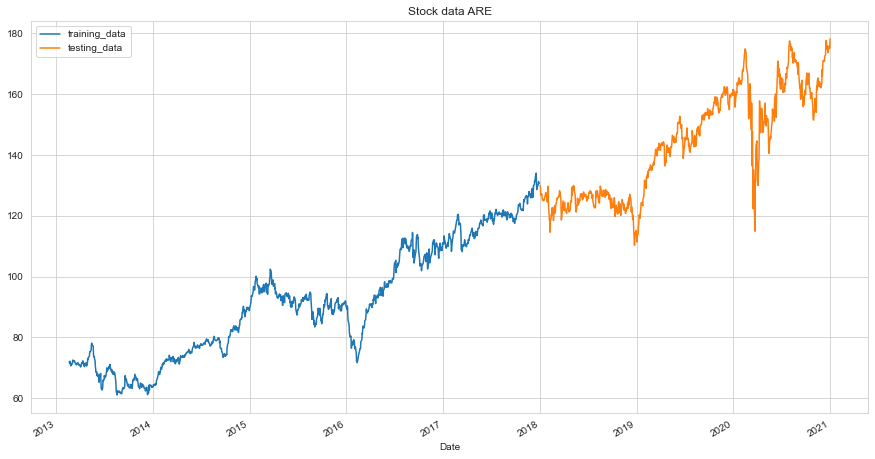

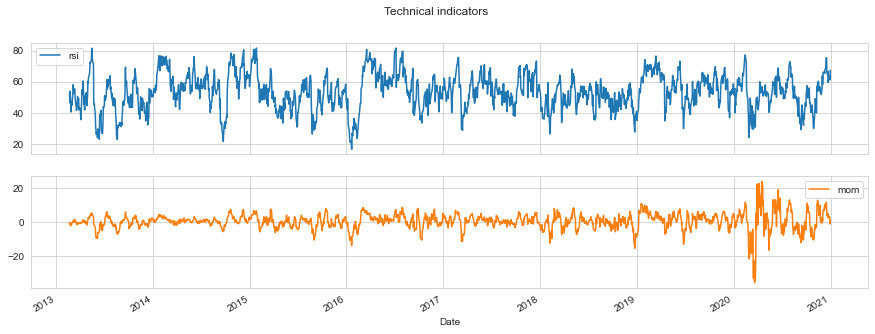

In [2]:
stock_name = 'are'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1342.33, duration: 0:00:00.208875
episode: 2/2000, episode end value: 1302.74, duration: 0:00:00.184888
episode: 3/2000, episode end value: 1350.11, duration: 0:00:00.191857
episode: 4/2000, episode end value: 1395.61, duration: 0:00:00.186013
episode: 5/2000, episode end value: 1287.05, duration: 0:00:00.182904
episode: 6/2000, episode end value: 1321.17, duration: 0:00:00.190142
episode: 7/2000, episode end value: 1361.39, duration: 0:00:00.196422
episode: 8/2000, episode end value: 1298.82, duration: 0:00:00.196504
episode: 9/2000, episode end value: 1347.49, duration: 0:00:00.188415
episode: 10/2000, episode end value: 1356.66, duration: 0:00:00.193118
episode: 11/2000, episode end value: 1260.11, duration: 0:00:00.187592
episode: 12/2000, episode end value: 1316.12, duration: 0:00:00.205108
episode: 13/2000, episode end value: 1363.02, duration: 0:00:00.194622
episode: 14/2000, episode end value: 1345.90, duration: 0:00:00.195584
episode: 15/200

episode: 117/2000, episode end value: 1283.12, duration: 0:00:00.215504
episode: 118/2000, episode end value: 1273.77, duration: 0:00:00.200904
episode: 119/2000, episode end value: 1281.62, duration: 0:00:00.213401
episode: 120/2000, episode end value: 1286.88, duration: 0:00:00.191273
episode: 121/2000, episode end value: 1287.55, duration: 0:00:00.205946
episode: 122/2000, episode end value: 1278.26, duration: 0:00:00.212298
episode: 123/2000, episode end value: 1283.60, duration: 0:00:00.215107
episode: 124/2000, episode end value: 1283.70, duration: 0:00:00.193269
episode: 125/2000, episode end value: 1286.69, duration: 0:00:00.199296
episode: 126/2000, episode end value: 1284.90, duration: 0:00:00.203615
episode: 127/2000, episode end value: 1294.84, duration: 0:00:00.211071
episode: 128/2000, episode end value: 1284.43, duration: 0:00:00.217431
episode: 129/2000, episode end value: 1279.66, duration: 0:00:00.203731
episode: 130/2000, episode end value: 1284.36, duration: 0:00:00

episode: 231/2000, episode end value: 1281.00, duration: 0:00:00.241052
episode: 232/2000, episode end value: 1281.35, duration: 0:00:00.248057
episode: 233/2000, episode end value: 1281.17, duration: 0:00:00.254057
episode: 234/2000, episode end value: 1288.28, duration: 0:00:00.290066
episode: 235/2000, episode end value: 1291.28, duration: 0:00:00.272063
episode: 236/2000, episode end value: 1283.82, duration: 0:00:00.269196
episode: 237/2000, episode end value: 1281.29, duration: 0:00:00.268060
episode: 238/2000, episode end value: 1296.14, duration: 0:00:00.273325
episode: 239/2000, episode end value: 1286.78, duration: 0:00:00.238328
episode: 240/2000, episode end value: 1280.01, duration: 0:00:00.245492
episode: 241/2000, episode end value: 1293.49, duration: 0:00:00.228050
episode: 242/2000, episode end value: 1291.38, duration: 0:00:00.243301
episode: 243/2000, episode end value: 1292.24, duration: 0:00:00.220560
episode: 244/2000, episode end value: 1292.16, duration: 0:00:00

episode: 345/2000, episode end value: 1289.13, duration: 0:00:00.316812
episode: 346/2000, episode end value: 1284.77, duration: 0:00:00.289064
episode: 347/2000, episode end value: 1288.67, duration: 0:00:00.297067
episode: 348/2000, episode end value: 1297.85, duration: 0:00:00.303069
episode: 349/2000, episode end value: 1281.67, duration: 0:00:00.353081
episode: 350/2000, episode end value: 1286.96, duration: 0:00:00.357079
episode: 351/2000, episode end value: 1296.26, duration: 0:00:00.327824
episode: 352/2000, episode end value: 1287.04, duration: 0:00:00.321033
episode: 353/2000, episode end value: 1284.64, duration: 0:00:00.300612
episode: 354/2000, episode end value: 1289.27, duration: 0:00:00.325498
episode: 355/2000, episode end value: 1285.63, duration: 0:00:00.280579
episode: 356/2000, episode end value: 1286.34, duration: 0:00:00.288603
episode: 357/2000, episode end value: 1284.78, duration: 0:00:00.277558
episode: 358/2000, episode end value: 1288.28, duration: 0:00:00

episode: 459/2000, episode end value: 1296.40, duration: 0:00:00.281830
episode: 460/2000, episode end value: 1291.75, duration: 0:00:00.264052
episode: 461/2000, episode end value: 1283.79, duration: 0:00:00.284376
episode: 462/2000, episode end value: 1284.14, duration: 0:00:00.294202
episode: 463/2000, episode end value: 1290.09, duration: 0:00:00.294615
episode: 464/2000, episode end value: 1282.41, duration: 0:00:00.288139
episode: 465/2000, episode end value: 1286.11, duration: 0:00:00.291980
episode: 466/2000, episode end value: 1305.73, duration: 0:00:00.283081
episode: 467/2000, episode end value: 1282.53, duration: 0:00:00.274247
episode: 468/2000, episode end value: 1289.48, duration: 0:00:00.374810
episode: 469/2000, episode end value: 1297.75, duration: 0:00:00.309068
episode: 470/2000, episode end value: 1278.91, duration: 0:00:00.289532
episode: 471/2000, episode end value: 1290.23, duration: 0:00:00.316492
episode: 472/2000, episode end value: 1289.69, duration: 0:00:00

episode: 573/2000, episode end value: 1287.18, duration: 0:00:00.356499
episode: 574/2000, episode end value: 1284.05, duration: 0:00:00.366415
episode: 575/2000, episode end value: 1290.40, duration: 0:00:00.379260
episode: 576/2000, episode end value: 1287.62, duration: 0:00:00.390938
episode: 577/2000, episode end value: 1284.38, duration: 0:00:00.412978
episode: 578/2000, episode end value: 1290.71, duration: 0:00:00.392936
episode: 579/2000, episode end value: 1284.58, duration: 0:00:00.454346
episode: 580/2000, episode end value: 1295.59, duration: 0:00:00.390191
episode: 581/2000, episode end value: 1284.53, duration: 0:00:00.440627
episode: 582/2000, episode end value: 1292.67, duration: 0:00:00.487842
episode: 583/2000, episode end value: 1289.27, duration: 0:00:00.415190
episode: 584/2000, episode end value: 1299.26, duration: 0:00:00.445424
episode: 585/2000, episode end value: 1290.32, duration: 0:00:00.390702
episode: 586/2000, episode end value: 1288.43, duration: 0:00:00

episode: 687/2000, episode end value: 1282.88, duration: 0:00:00.381803
episode: 688/2000, episode end value: 1283.73, duration: 0:00:00.430422
episode: 689/2000, episode end value: 1289.67, duration: 0:00:00.417118
episode: 690/2000, episode end value: 1286.21, duration: 0:00:00.429373
episode: 691/2000, episode end value: 1286.17, duration: 0:00:00.460575
episode: 692/2000, episode end value: 1282.65, duration: 0:00:00.438277
episode: 693/2000, episode end value: 1283.38, duration: 0:00:00.387291
episode: 694/2000, episode end value: 1287.54, duration: 0:00:00.430896
episode: 695/2000, episode end value: 1288.49, duration: 0:00:00.381849
episode: 696/2000, episode end value: 1287.59, duration: 0:00:00.418335
episode: 697/2000, episode end value: 1295.11, duration: 0:00:00.456121
episode: 698/2000, episode end value: 1290.52, duration: 0:00:00.416324
episode: 699/2000, episode end value: 1284.28, duration: 0:00:00.399189
episode: 700/2000, episode end value: 1297.36, duration: 0:00:00

episode: 801/2000, episode end value: 1288.49, duration: 0:00:00.448525
episode: 802/2000, episode end value: 1283.31, duration: 0:00:00.470521
episode: 803/2000, episode end value: 1285.80, duration: 0:00:00.424827
episode: 804/2000, episode end value: 1290.84, duration: 0:00:00.433630
episode: 805/2000, episode end value: 1292.06, duration: 0:00:00.416350
episode: 806/2000, episode end value: 1289.94, duration: 0:00:00.511025
episode: 807/2000, episode end value: 1297.15, duration: 0:00:00.422785
episode: 808/2000, episode end value: 1283.50, duration: 0:00:00.466873
episode: 809/2000, episode end value: 1283.82, duration: 0:00:00.455602
episode: 810/2000, episode end value: 1282.76, duration: 0:00:00.417847
episode: 811/2000, episode end value: 1296.93, duration: 0:00:00.437996
episode: 812/2000, episode end value: 1302.52, duration: 0:00:00.350682
episode: 813/2000, episode end value: 1285.98, duration: 0:00:00.441924
episode: 814/2000, episode end value: 1279.69, duration: 0:00:00

episode: 915/2000, episode end value: 1285.05, duration: 0:00:00.487387
episode: 916/2000, episode end value: 1284.72, duration: 0:00:00.451812
episode: 917/2000, episode end value: 1289.50, duration: 0:00:00.443332
episode: 918/2000, episode end value: 1291.60, duration: 0:00:00.434173
episode: 919/2000, episode end value: 1288.49, duration: 0:00:00.415261
episode: 920/2000, episode end value: 1288.50, duration: 0:00:00.440001
episode: 921/2000, episode end value: 1289.32, duration: 0:00:00.442237
episode: 922/2000, episode end value: 1282.60, duration: 0:00:00.477017
episode: 923/2000, episode end value: 1293.69, duration: 0:00:00.393823
episode: 924/2000, episode end value: 1287.64, duration: 0:00:00.390580
episode: 925/2000, episode end value: 1301.80, duration: 0:00:00.401448
episode: 926/2000, episode end value: 1288.91, duration: 0:00:00.364083
episode: 927/2000, episode end value: 1287.02, duration: 0:00:00.417430
episode: 928/2000, episode end value: 1290.03, duration: 0:00:00

episode: 1029/2000, episode end value: 1289.47, duration: 0:00:00.469173
episode: 1030/2000, episode end value: 1292.10, duration: 0:00:00.414214
episode: 1031/2000, episode end value: 1288.50, duration: 0:00:00.421950
episode: 1032/2000, episode end value: 1288.77, duration: 0:00:00.437500
episode: 1033/2000, episode end value: 1287.35, duration: 0:00:00.420501
episode: 1034/2000, episode end value: 1288.55, duration: 0:00:00.421353
episode: 1035/2000, episode end value: 1289.85, duration: 0:00:00.399604
episode: 1036/2000, episode end value: 1287.52, duration: 0:00:00.374659
episode: 1037/2000, episode end value: 1291.67, duration: 0:00:00.417646
episode: 1038/2000, episode end value: 1300.90, duration: 0:00:00.438273
episode: 1039/2000, episode end value: 1291.91, duration: 0:00:00.405964
episode: 1040/2000, episode end value: 1289.76, duration: 0:00:00.439841
episode: 1041/2000, episode end value: 1287.26, duration: 0:00:00.496402
episode: 1042/2000, episode end value: 1284.24, dur

episode: 1142/2000, episode end value: 1284.17, duration: 0:00:00.439194
episode: 1143/2000, episode end value: 1284.59, duration: 0:00:00.400663
episode: 1144/2000, episode end value: 1283.73, duration: 0:00:00.416111
episode: 1145/2000, episode end value: 1290.20, duration: 0:00:00.449635
episode: 1146/2000, episode end value: 1288.23, duration: 0:00:00.445267
episode: 1147/2000, episode end value: 1286.44, duration: 0:00:00.442581
episode: 1148/2000, episode end value: 1287.72, duration: 0:00:00.380865
episode: 1149/2000, episode end value: 1286.61, duration: 0:00:00.353325
episode: 1150/2000, episode end value: 1299.12, duration: 0:00:00.424014
episode: 1151/2000, episode end value: 1288.27, duration: 0:00:00.397743
episode: 1152/2000, episode end value: 1290.47, duration: 0:00:00.427939
episode: 1153/2000, episode end value: 1297.89, duration: 0:00:00.419190
episode: 1154/2000, episode end value: 1288.86, duration: 0:00:00.384167
episode: 1155/2000, episode end value: 1284.62, dur

episode: 1255/2000, episode end value: 1286.33, duration: 0:00:00.440288
episode: 1256/2000, episode end value: 1287.52, duration: 0:00:00.459501
episode: 1257/2000, episode end value: 1284.97, duration: 0:00:00.428741
episode: 1258/2000, episode end value: 1286.43, duration: 0:00:00.395440
episode: 1259/2000, episode end value: 1284.61, duration: 0:00:00.381852
episode: 1260/2000, episode end value: 1281.08, duration: 0:00:00.381956
episode: 1261/2000, episode end value: 1298.69, duration: 0:00:00.421293
episode: 1262/2000, episode end value: 1288.76, duration: 0:00:00.394617
episode: 1263/2000, episode end value: 1286.74, duration: 0:00:00.425054
episode: 1264/2000, episode end value: 1285.91, duration: 0:00:00.394926
episode: 1265/2000, episode end value: 1288.28, duration: 0:00:00.381235
episode: 1266/2000, episode end value: 1287.24, duration: 0:00:00.403558
episode: 1267/2000, episode end value: 1295.45, duration: 0:00:00.509374
episode: 1268/2000, episode end value: 1286.04, dur

episode: 1368/2000, episode end value: 1291.37, duration: 0:00:00.438735
episode: 1369/2000, episode end value: 1284.07, duration: 0:00:00.412831
episode: 1370/2000, episode end value: 1286.91, duration: 0:00:00.539138
episode: 1371/2000, episode end value: 1289.53, duration: 0:00:00.500898
episode: 1372/2000, episode end value: 1290.00, duration: 0:00:00.457720
episode: 1373/2000, episode end value: 1281.31, duration: 0:00:00.481697
episode: 1374/2000, episode end value: 1285.36, duration: 0:00:00.487239
episode: 1375/2000, episode end value: 1286.26, duration: 0:00:00.367165
episode: 1376/2000, episode end value: 1286.87, duration: 0:00:00.392946
episode: 1377/2000, episode end value: 1287.25, duration: 0:00:00.402706
episode: 1378/2000, episode end value: 1298.78, duration: 0:00:00.393183
episode: 1379/2000, episode end value: 1292.36, duration: 0:00:00.389610
episode: 1380/2000, episode end value: 1290.02, duration: 0:00:00.508142
episode: 1381/2000, episode end value: 1290.70, dur

episode: 1481/2000, episode end value: 1286.15, duration: 0:00:00.443275
episode: 1482/2000, episode end value: 1282.58, duration: 0:00:00.390462
episode: 1483/2000, episode end value: 1303.73, duration: 0:00:00.474418
episode: 1484/2000, episode end value: 1291.99, duration: 0:00:00.424598
episode: 1485/2000, episode end value: 1291.97, duration: 0:00:00.455744
episode: 1486/2000, episode end value: 1292.65, duration: 0:00:00.472862
episode: 1487/2000, episode end value: 1289.85, duration: 0:00:00.381966
episode: 1488/2000, episode end value: 1285.79, duration: 0:00:00.515126
episode: 1489/2000, episode end value: 1292.35, duration: 0:00:00.485726
episode: 1490/2000, episode end value: 1285.95, duration: 0:00:00.408487
episode: 1491/2000, episode end value: 1288.15, duration: 0:00:00.441690
episode: 1492/2000, episode end value: 1302.03, duration: 0:00:00.456243
episode: 1493/2000, episode end value: 1295.25, duration: 0:00:00.396685
episode: 1494/2000, episode end value: 1287.18, dur

episode: 1594/2000, episode end value: 1293.86, duration: 0:00:00.392490
episode: 1595/2000, episode end value: 1287.59, duration: 0:00:00.429341
episode: 1596/2000, episode end value: 1286.77, duration: 0:00:00.435892
episode: 1597/2000, episode end value: 1288.27, duration: 0:00:00.387176
episode: 1598/2000, episode end value: 1295.49, duration: 0:00:00.357407
episode: 1599/2000, episode end value: 1287.93, duration: 0:00:00.374247
episode: 1600/2000, episode end value: 1287.98, duration: 0:00:00.411894
episode: 1601/2000, episode end value: 1287.64, duration: 0:00:00.386532
episode: 1602/2000, episode end value: 1288.13, duration: 0:00:00.382906
episode: 1603/2000, episode end value: 1288.40, duration: 0:00:00.448989
episode: 1604/2000, episode end value: 1286.94, duration: 0:00:00.470904
episode: 1605/2000, episode end value: 1282.60, duration: 0:00:00.375260
episode: 1606/2000, episode end value: 1282.47, duration: 0:00:00.449633
episode: 1607/2000, episode end value: 1284.82, dur

episode: 1707/2000, episode end value: 1285.05, duration: 0:00:00.458446
episode: 1708/2000, episode end value: 1286.42, duration: 0:00:00.443147
episode: 1709/2000, episode end value: 1286.74, duration: 0:00:00.396215
episode: 1710/2000, episode end value: 1296.91, duration: 0:00:00.390200
episode: 1711/2000, episode end value: 1285.96, duration: 0:00:00.353372
episode: 1712/2000, episode end value: 1300.01, duration: 0:00:00.371213
episode: 1713/2000, episode end value: 1286.68, duration: 0:00:00.438026
episode: 1714/2000, episode end value: 1288.10, duration: 0:00:00.468393
episode: 1715/2000, episode end value: 1287.23, duration: 0:00:00.439009
episode: 1716/2000, episode end value: 1291.17, duration: 0:00:00.403623
episode: 1717/2000, episode end value: 1294.67, duration: 0:00:00.492482
episode: 1718/2000, episode end value: 1298.18, duration: 0:00:00.412029
episode: 1719/2000, episode end value: 1286.74, duration: 0:00:00.403081
episode: 1720/2000, episode end value: 1295.16, dur

episode: 1820/2000, episode end value: 1287.88, duration: 0:00:00.386618
episode: 1821/2000, episode end value: 1288.82, duration: 0:00:00.401478
episode: 1822/2000, episode end value: 1290.89, duration: 0:00:00.403845
episode: 1823/2000, episode end value: 1284.75, duration: 0:00:00.404957
episode: 1824/2000, episode end value: 1292.49, duration: 0:00:00.393249
episode: 1825/2000, episode end value: 1290.19, duration: 0:00:00.463581
episode: 1826/2000, episode end value: 1287.40, duration: 0:00:00.396978
episode: 1827/2000, episode end value: 1287.23, duration: 0:00:00.438435
episode: 1828/2000, episode end value: 1285.82, duration: 0:00:00.383513
episode: 1829/2000, episode end value: 1284.95, duration: 0:00:00.463359
episode: 1830/2000, episode end value: 1289.18, duration: 0:00:00.488287
episode: 1831/2000, episode end value: 1288.77, duration: 0:00:00.430788
episode: 1832/2000, episode end value: 1286.34, duration: 0:00:00.481844
episode: 1833/2000, episode end value: 1294.12, dur

episode: 1933/2000, episode end value: 1284.41, duration: 0:00:00.448616
episode: 1934/2000, episode end value: 1285.34, duration: 0:00:00.463369
episode: 1935/2000, episode end value: 1292.75, duration: 0:00:00.374417
episode: 1936/2000, episode end value: 1284.40, duration: 0:00:00.376527
episode: 1937/2000, episode end value: 1285.85, duration: 0:00:00.467421
episode: 1938/2000, episode end value: 1286.00, duration: 0:00:00.411898
episode: 1939/2000, episode end value: 1294.43, duration: 0:00:00.473082
episode: 1940/2000, episode end value: 1287.06, duration: 0:00:00.382354
episode: 1941/2000, episode end value: 1297.87, duration: 0:00:00.409060
episode: 1942/2000, episode end value: 1288.21, duration: 0:00:00.414339
episode: 1943/2000, episode end value: 1286.42, duration: 0:00:00.458603
episode: 1944/2000, episode end value: 1287.46, duration: 0:00:00.405239
episode: 1945/2000, episode end value: 1291.43, duration: 0:00:00.432012
episode: 1946/2000, episode end value: 1286.77, dur

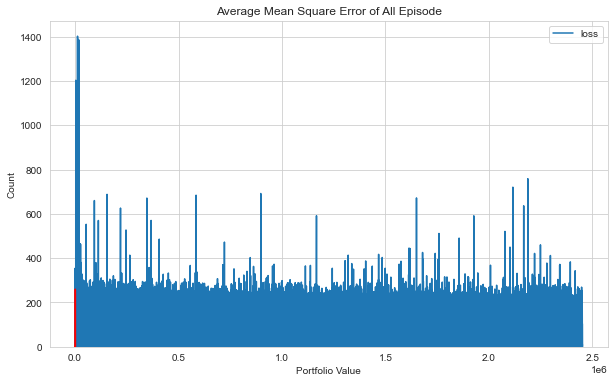

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

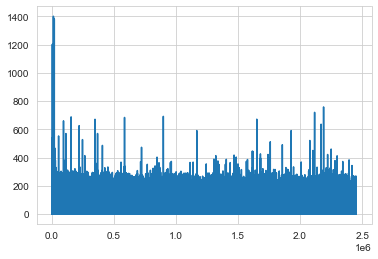

In [5]:
plt.plot(agent.model.losses)

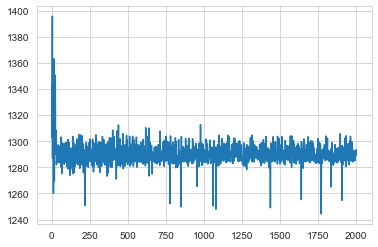

In [6]:
plt.plot(portfolio_value)

episode end value: 1228.00, duration: 0:00:00.193099
Sell: 404 times, Buy: 350 times


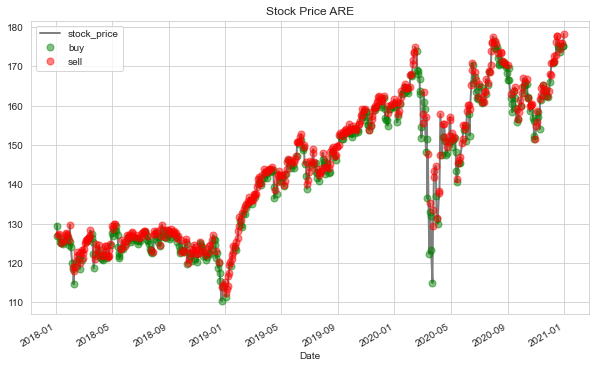

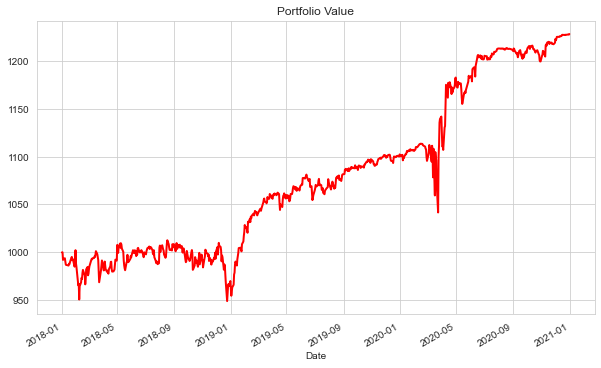

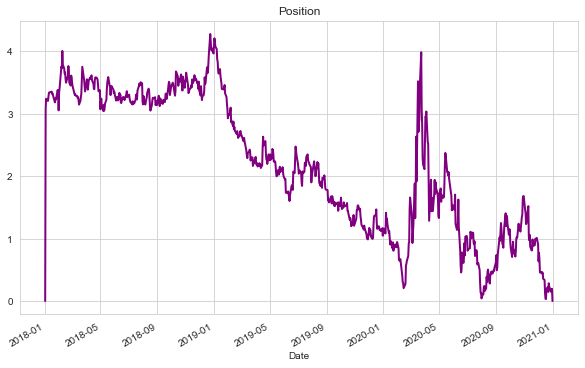

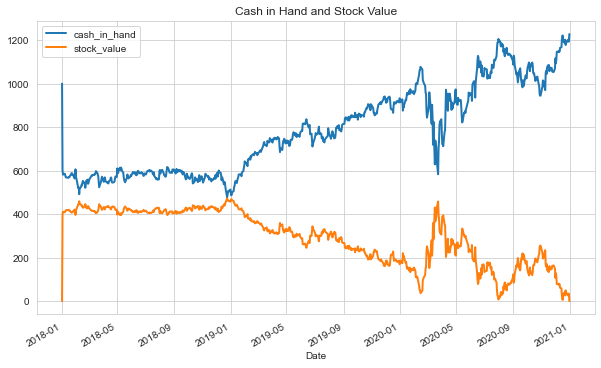

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: ARE
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.09 %
Volatility: 0.0896
shape ratio: 0.6678
Maximun drawdown: -6.45 %
Calmar ratio: 1.0985
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 11.11 %
Volatility (benchmark): 0.2848
shape ratio: 0.3515
Maximun drawdown: -34.31 %
Calmar ratio (benchmark): 0.3238


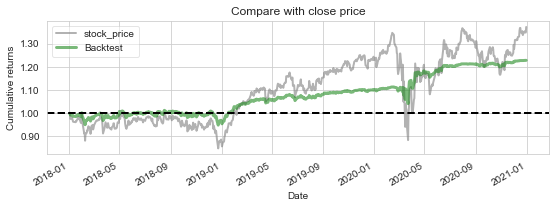

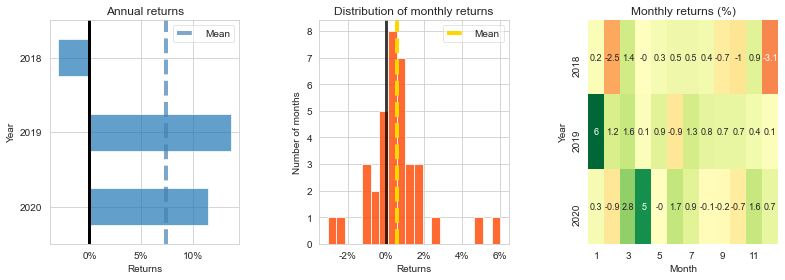

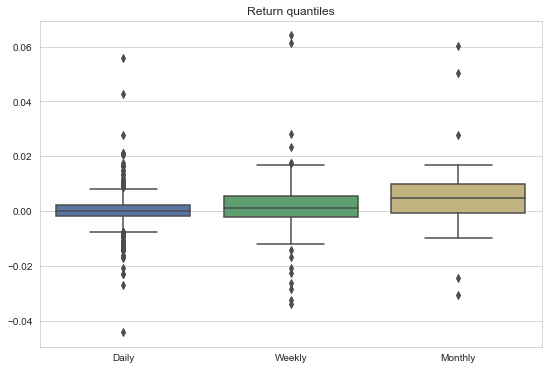

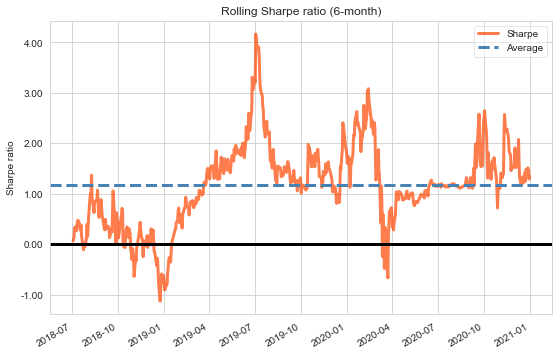

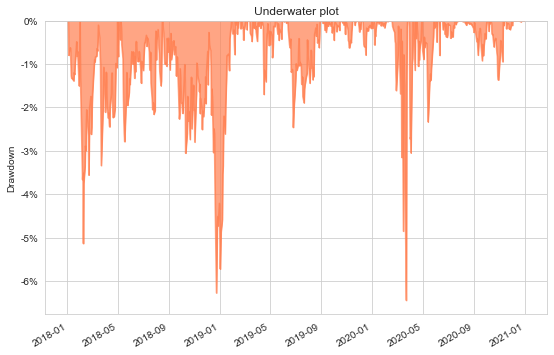

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')